<a href="https://colab.research.google.com/github/pankovakris/coursera/blob/main/Stepik_CV_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚆 Train dataset 🚆


In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [5]:
x_train = torch.rand(100) #100 штук равномерного распределения от 0 до единицы
x_train = x_train * 20 - 10 #чтобы график был по центру
y_train = torch.sin(x_train) #создаем целевые



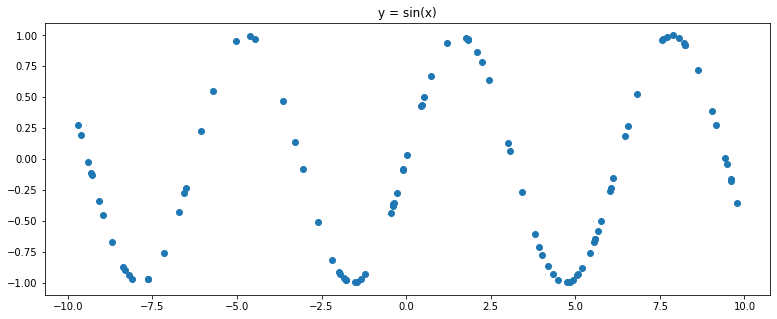

In [6]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o') #удобно торч-тензоры переводить в нампай-массивы для экономии памяти
plt.title('y = sin(x)');

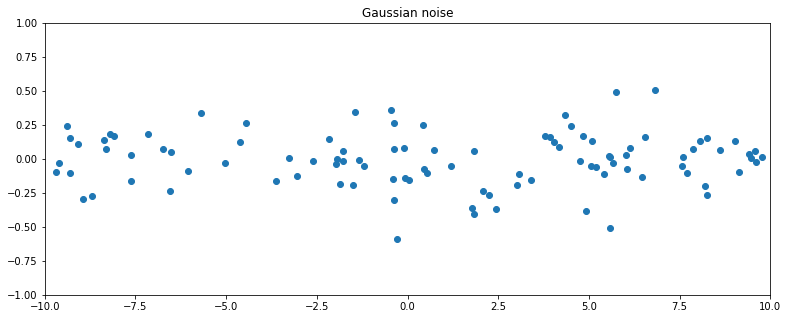

In [7]:
#шумим
noise = torch.randn(y_train.shape) / 5
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

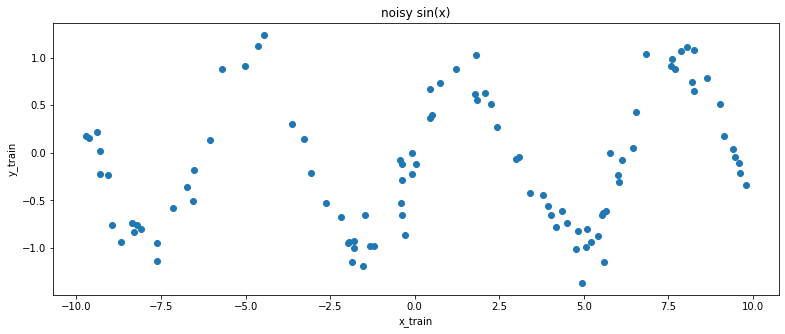

In [8]:
y_train = y_train + noise #шумим чтобы жизнь мёдом не казалась
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [9]:
tmp = torch.Tensor([1, 2, 3])
tmp.unsqueeze_(1) #переводим в столбец (не совсем транспонирование!!!, добавляет измерения) ALSO опять нижнее подчеркивание, те торч-метод трансформирует объект на месте
print(tmp)
tmp.squeeze_(1) #переводим в строку обратно
print(tmp)

tensor([[1.],
        [2.],
        [3.]])
tensor([1., 2., 3.])


In [10]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
x_train[:5]

tensor([[ 5.5750],
        [-8.6923],
        [ 7.8799],
        [-3.0590],
        [ 1.2118]])

# 🧪 Test dataset 🧪

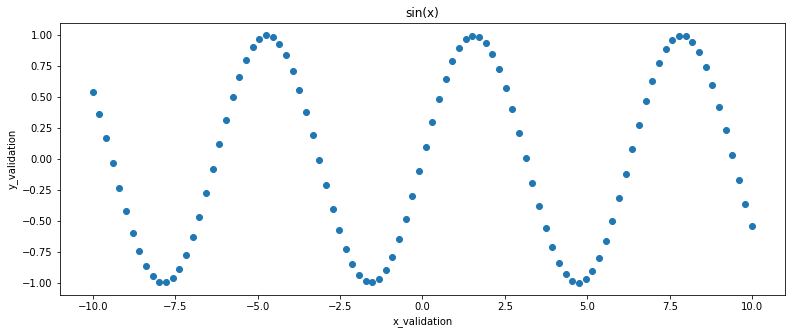

In [11]:
x_test = torch.linspace(-10, 10, 100)
y_test = torch.sin(x_test.data)
plt.plot(x_test.numpy(), y_test.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');


In [21]:
x_test.unsqueeze_(1)
y_test.unsqueeze_(1)
y_test[:5]

tensor([[[ 0.5440]],

        [[ 0.3646]],

        [[ 0.1703]],

        [[-0.0308]],

        [[-0.2308]]])

# 🔮 Model construction 🔮

---



С def __init__(self) мы имеем требуемую super() функцию языка Python, которая создает объект базового класса. В следующих трех строках создаем полностью соединенные слои как показано на диаграмме архитектуры. Полностью соединенный слой нейронной сети представлен объектом nn.Linear, в котором первый аргумент — определение количества узлов в i-том слое, а второй — количество узлов в i+1 слое.

После определения скелета архитектуры сети, необходимо задать принципы, по которым данные будут перемещаться по ней. Это делается с помощью определяемого метода forward(),  который переписывает фиктивный метод в базовом классе и требует определения для каждой сети:



In [14]:
class SineNet(torch.nn.Module): #наследуем Базу
  def __init__(self, n_hidden_neurons): #берем кол-во скрытых нейронов в каждом слое
    super(SineNet, self).__init__()
    self.f1 = torch.nn.Linear(1, n_hidden_neurons) #Linear - fully connected слой, полносвязный, на входе кол-во входных нейронов (1, тк мы предсказываем по 1 координате x
    #, если бы пространство было n-мерным, то в начале было бы число n, не 1) и выходных
    self.ac1 = torch.nn.Sigmoid() #берем сигмоиду как функцию активации
    self.f2 = torch.nn.Linear(n_hidden_neurons, 1) #будет выдавать ответ на нашу задачу регрессии
  
  def forward(self, x): #то, как наши слои последовательно применяется
    x = self.f1(x)
    x = self.ac1(x)
    x = self.f2(x)
    return x


sine_net = SineNet(50)

# ⚡ Prediction ⚡
(На самом деле loss и функция потерь)

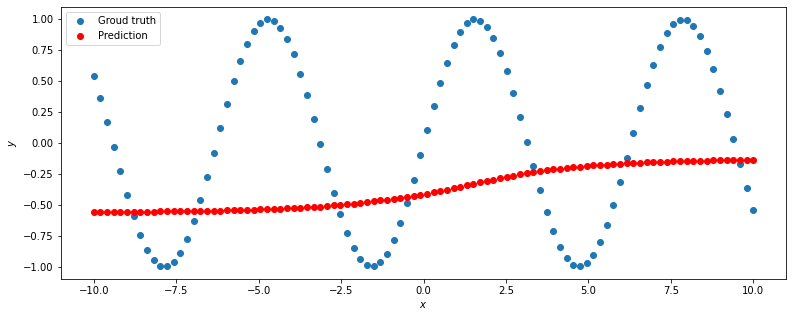

In [15]:
def predict(net, x, y):
  y_pred = net.forward(x)
  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

predict(sine_net, x_test, y_test)

дэээмн, not fun

а что если взять и использовать?? оптимизатор??? с градиентным спуском????

In [16]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

А если еще и функцию потерь вообще жесть (Тут MSEшка)

In [17]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# 🎮 Training procedure 🎮

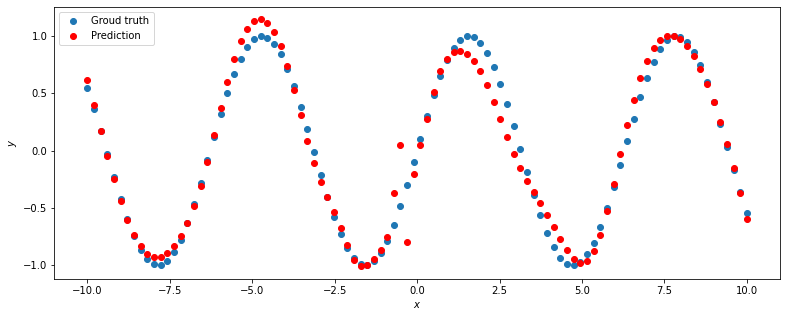

In [20]:
for epoch_index in range(2000):
    optimizer.zero_grad() #Обнуляем градиенты в каждой эпохе!!

    y_pred = sine_net.forward(x_train) 
    loss_val = loss(y_pred, y_train) #считаем функцию потерь

    loss_val.backward() #посчитали производную

    optimizer.step() #сделали градиентный шаг

predict(sine_net, x_test, y_test)

Великолепно 🍷